ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1
 
1. Загрузите изображение в оттенках серого sar_1_gray.jpg
-------------------------------------------------------------
Изображение sar_1_gray.jpg успешно загружено:


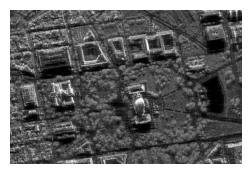

 
 
2. Постройте гистограмму
------------------------------


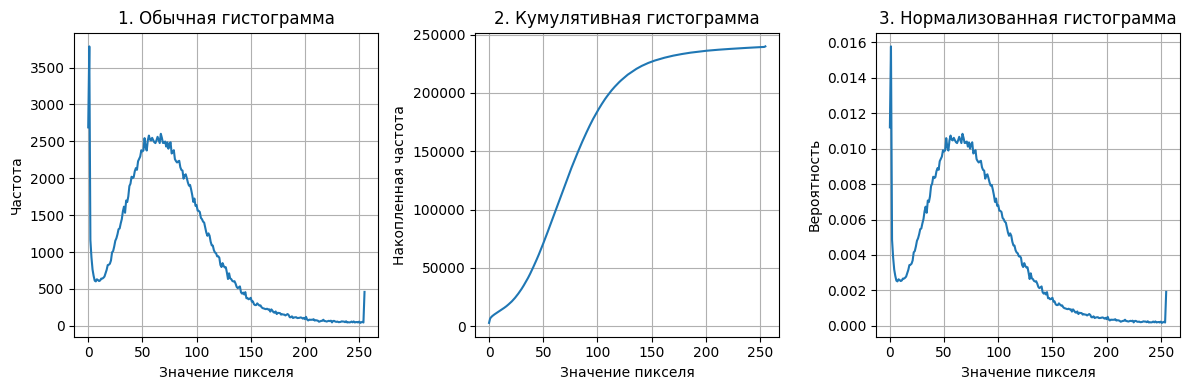

 
 
3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1
----------------------------------------------------------------------


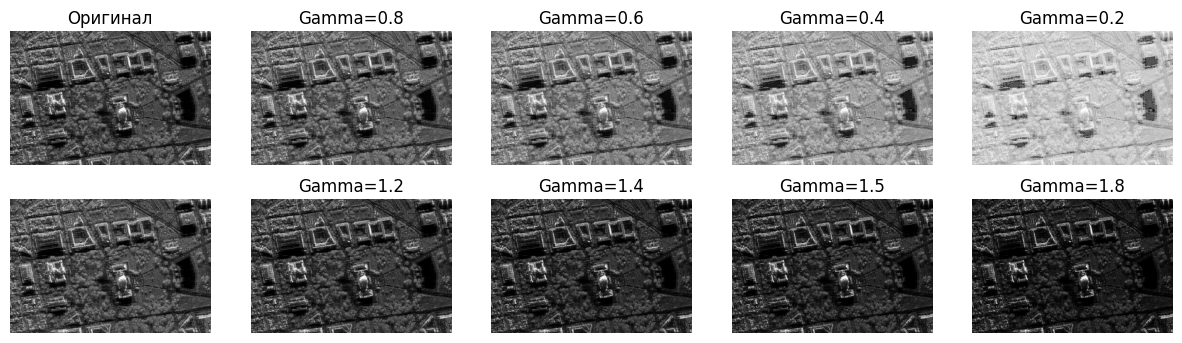

 
 
4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM
----------------------------------------------------------------------------------------


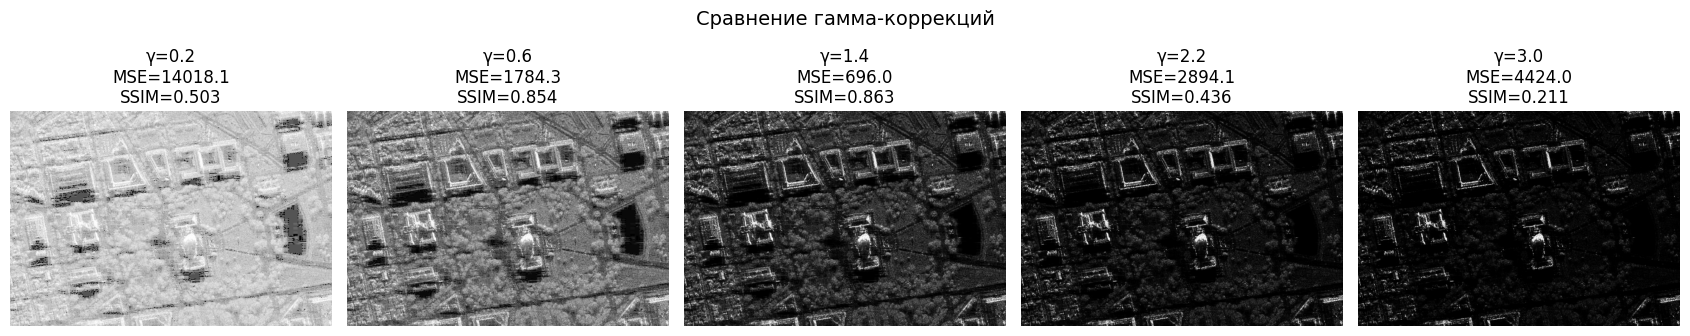

 
 
5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
--------------------------------------------------------------------------------
Исходная статистика: mean=74.94, std=43.66
Целевая статистика (eq_gray): mean=127.03, std=74.27
Результат коррекции: mean=123.12, std=65.30


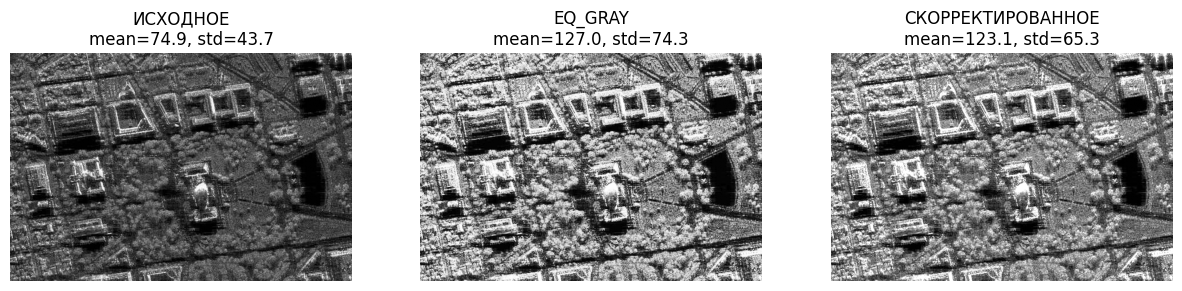

 
 
6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
--------------------------------------------------------------------------------


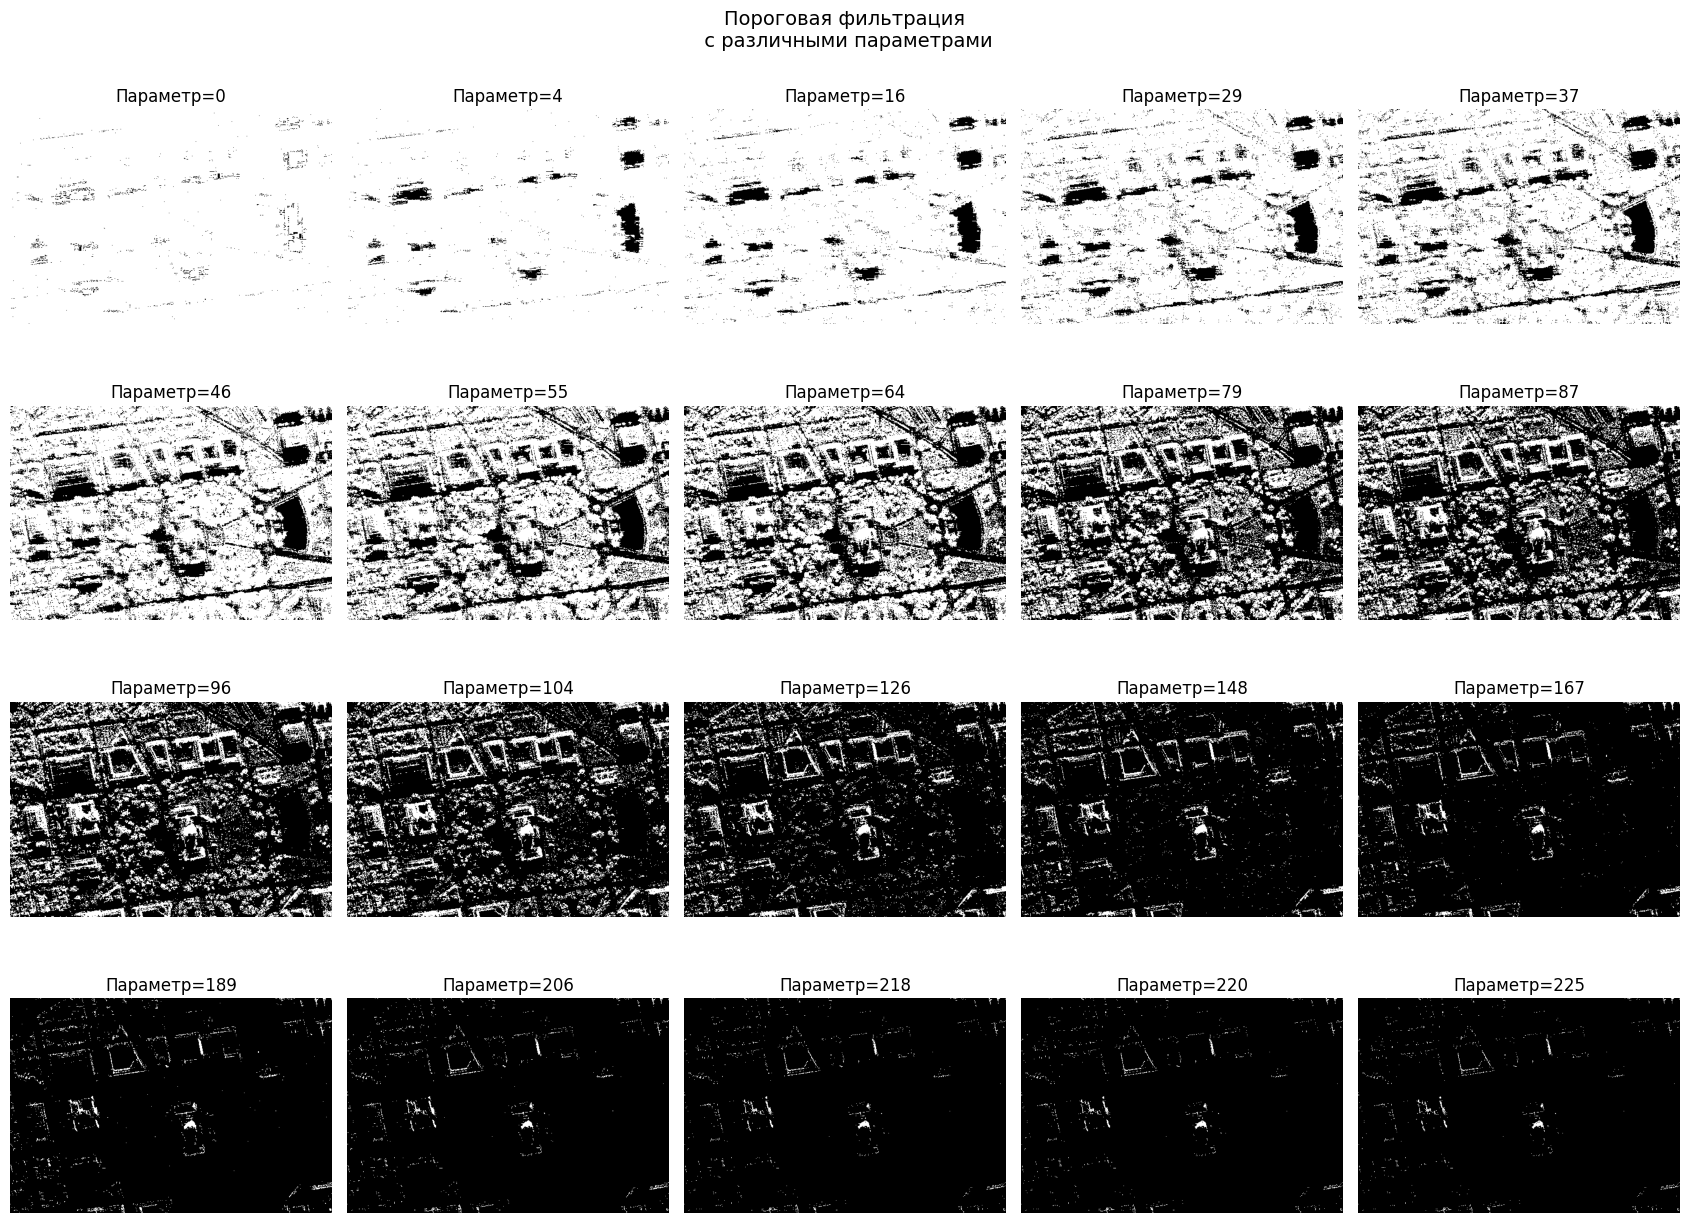

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import os

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1")
print("="*50)
print(" ")

###1 ЗАДАНИЕ : Загрузите изображение в оттенках серого sar_1_gray.jpg
print("1. Загрузите изображение в оттенках серого sar_1_gray.jpg")
print("-"*61)
image = cv2.imread('sar_1_gray.jpg')   # Загружаем изображение
if image is None:
    print("Изображение не найдено")
else:
    print("Изображение sar_1_gray.jpg успешно загружено:")
# Отображаем в блокноте
plt.figure(figsize=(8, 2))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()
print(" ")
print(" ")



###2 ЗАДАНИЕ: постройте гистограмму
print("2. Постройте гистограмму")
print("-"*30)
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist / (image.shape[0] * image.shape[1])

plt.figure(figsize=(12, 4))

# 1. Обычная гистограмма
plt.subplot(1, 3, 1)
plt.plot(b_hist)
plt.title('1. Обычная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Частота')
plt.grid(True)

# 2. Кумулятивная гистограмма
plt.subplot(1, 3, 2)
plt.plot(b_hist_cum)
plt.title('2. Кумулятивная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Накопленная частота')
plt.grid(True)

# 3. Нормализованная гистограмма
plt.subplot(1, 3, 3)
plt.plot(b_hist_norm)
plt.title('3. Нормализованная гистограмма')
plt.xlabel('Значение пикселя')
plt.ylabel('Вероятность')
plt.grid(True)

plt.tight_layout()
plt.show()
print(" ")
print(" ")



###3 ЗАДАНИЕ: реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# формула Rcor = (Runcor / Rmax)^y * Rmax
print("3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1")
print("-"*70)
def gamma_correction(R_uncor, gamma: float):
    R_max = 255.0
    R_cor = ((R_uncor / R_max) ** gamma) * R_max
    return np.uint8(R_cor)

gamma_val = [0.8, 0.6, 0.4, 0.2, 1.0, 1.2, 1.4, 1.5, 1.8 ]
plt.figure(figsize=(15, 4))

# Оригинал
plt.subplot(2, 5, 1)
plt.imshow(image)
plt.title("Оригинал")
plt.axis("off")

# Результаты с разными gamma
for i in range(len(gamma_val)):
    plt.subplot(2, 5, i+2)
    gamma = gamma_val[i]
    image_gamma = gamma_correction(image, gamma)
    plt.imshow(image_gamma)
    if (i != 4):
        plt.title(f"Gamma={gamma}")
    plt.axis("off")
plt.show()
print(" ")
print(" ")



###4 ЗАДАНИЕ: Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
print("4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM")
print("-"*88)

def mse(imageA, imageB):
    #Среднеквадратичная ошибка
    err = np.mean((imageA.astype("float") - imageB.astype("float")) ** 2)
    return err

def ssim_(imageA, imageB):
    """SSIM и карта различий"""
    # Приводим к grayscale, если нужно
    if len(imageA.shape) == 3:
        imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    if len(imageB.shape) == 3:
        imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    imageA = imageA.astype(np.uint8)
    imageB = imageB.astype(np.uint8)
    return structural_similarity(imageA, imageB, data_range=255)

#Сравнение с разными gamma
gamma_values = [0.2, 0.6, 1.4, 2.2, 3.0]
plt.figure(figsize=(17, 4))
for i, gamma in enumerate(gamma_values):
    img_gamma = gamma_correction(image, gamma)
    mse_val = mse(image, img_gamma)
    ssim_val = ssim_(image, img_gamma)
    plt.subplot(1, len(gamma_values), i+1)
    plt.imshow(img_gamma)
    plt.title(f"γ={gamma}\nMSE={mse_val:.1f}\nSSIM={ssim_val:.3f}")
    plt.axis('off')

plt.suptitle("Сравнение гамма-коррекций", fontsize=14)
plt.tight_layout()
plt.show()
print(" ")
print(" ")



###5 ЗАДАНИЕ: реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
print("5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.")
print("-"*80)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #хоть и изначальное изображение у нас в чб
mean = image_gray.mean()
std = image_gray.std()
print(f"Исходная статистика: mean={mean:.2f}, std={std:.2f}")

eq_gray = cv2.equalizeHist(image_gray)
mean_eq = eq_gray.mean()
std_eq  = eq_gray.std()
print(f"Целевая статистика (eq_gray): mean={mean_eq:.2f}, std={std_eq:.2f}")

#Формула: C'T = Ex + (Cx - Ey) * (Dx/Dy) ; Ex, Dx - целевые (из eq_gray), Cx, Dy, Ey - исходные (из image_gray)
corrected_image = image_gray.astype(np.float32)
if std > 0:  # избегаем деления на 0
    corrected_image = mean_eq + (corrected_image - mean) *(std_eq/std)
else:
    print("Предупреждение: std исходного изображения = 0")
    corrected_image = np.full_like(corrected_image, mean_eq)

corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

mean_result = corrected_image.mean()
std_result = corrected_image.std()
print(f"Результат коррекции: mean={mean_result:.2f}, std={std_result:.2f}")

plt.figure(figsize=(15, 4))

# 1. ИСХОДНОЕ ИЗОБРАЖЕНИЕ
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
plt.title(f'ИСХОДНОЕ\nmean={mean:.1f}, std={std:.1f}')
plt.axis('off')

# 2. EQ_GRAY
plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray', vmin=0, vmax=255)
plt.title(f'EQ_GRAY\nmean={mean_eq:.1f}, std={std_eq:.1f}')
plt.axis('off')

# 3. СКОРРЕКТИРОВАННОЕ ИЗОБРАЖЕНИЕ
plt.subplot(1, 3, 3)
plt.imshow(corrected_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'СКОРРЕКТИРОВАННОЕ\nmean={mean_result:.1f}, std={std_result:.1f}')
plt.axis('off')
plt.show()
print(" ")
print(" ")



###6 ЗАДАНИЕ: Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
print("6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.")
print("-"*80)
diff_values = [0, 4, 16, 29, 37, 46, 55, 64, 79, 87, 96, 104, 126, 148, 167, 189, 206, 218, 220, 225]
plt.figure(figsize=(17, 13))
for i in range(0, 20):
    _,thresh1 = cv2.threshold(image_gray, diff_values[i] ,255,cv2.THRESH_BINARY)
    plt.subplot(4, 5, i+1)
    plt.imshow(thresh1, cmap='gray')
    plt.title(f"Параметр={diff_values[i]}")
    plt.axis('off')

plt.suptitle("Пороговая фильтрация\n с различными параметрами", fontsize=14)
plt.tight_layout()
plt.show()